# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 5-1, 5-2 강: 기계학습 작업 흐름도$^{ML \ Workflow}$


- 학습 목표
    기계학습의 전체 과정을 이해하여 단계별 작업에 필요한 흐름을 이해한다. 

- 학습 내용(5-1)
    - 기계학습 작업 과정에 대한 이해 
    - 학습 자료 준비
    - 학습 자료 읽기
    - 학습 자료에서 노이즈
    
- 학습 내용(5-2)
    - 학습 자료 준비
    - 학습 자료 전처리
    - 오차/정확도 측정


기계학습의 작업을 간단히 요약한다면 다음과 같은 과정을 거치게 됩니다. 
1. 기계학습은 자료를 수집 및 가공하여 훈련 자료와 검증 자료로 나눕니다. 자료를 둘로 나눌 때는 훈련 자료를 검증 자료보다 더 많이 할당합니다. 자료의 종류와 전체 량에 따라 달라지겠지만, 보통 8:2 혹은 7:3으로 설정합니다.  
2. 사용해야 할 기계학습 알고리즘을 정하고, 훈련 자료를 이용하여 기계학습을 진행하여 가중치를 구하여 기계학습 모델을 완성합니다. 
3. 기계학습 모델에 검증 자료를 적용하여 예측합니다. 

마지막 단계에서, 예측 결과를 만족하면 기계학습 모델을 완성한 것이며 모델을 실전에 배치합니다. 그러나, 예측 결과에 만족하지 않으면, 그 원인을 분석하여 다른 기계학습 알고리즘을 선택하거나, __하이퍼 파라미터__(학습률, 에포크 등등)를 재학습 하게 됩니다.   

본 강의에서는 이러한 기계학습 작업 흐름도를 대략적으로 밟아보도록 하겠습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MachineLearningWorkflow.png?raw=true" width="600">
<center>그림 1: 기계 학습 작업 흐름도 1</center>

# 퍼셉트론 예제 2

본 강의에서는 기계학습의 작업흐름을 __퍼셉트론 예제 2__를 직접 구현하는 방법으로 다루도록 하겠습니다. 

### 1. 학습 자료의 준비 단계$^{Dataset \ Prep \ Step}$

기계학습의 과정에서 제일 먼저 어떤 자료를 어떻게, 얼만큼 수집을 해야 할지는 통과해야 할 가장 큰 관문 중에 하나입니다. 그러나, 우리가 여기서는 우리가 사용할 자료는 이미 수집되어 텍스트 파일(`data/joydata.txt`)에 저장되어 있다고 가정합니다. 

- 첫 단계는 파일의 자료들을 읽어서 학습 자료 즉 데이터셋$^{Dataset}$을 만듭니다. 파일에는 자료들이 탭으로 구분되어 저장되어 있습니다. 다음은 파일의 첫 5줄입니다. 
```
-1.72	-3.12	1
0.31	1.85	1
1.56	2.85	1
2.64	2.41	1
1.23	2.54	1
```
- 데이터셋에 있는 세 열$^{Column}$은 특성1($x_1$), 특성2($x_2$), 클래스 레이블($y$)의 순서입니다. 
- 데이터셋에는 100개의 자료가 있으며, 클레스 레이블로 정렬되었으며, 각각 50개씩 입니다
- 참고로, 본 자료를 시각화하면 class 1의 자료(-1.72, -3.12) 하나가 class 2의 자료들 중에 있다는 것을 알 수 있습니다. 일종의 노이즈$^{noise}$를 넣어둔 것입니다. 이 노이즈가 없는 자료 파일은 `data/joy_data.txt`입니다. 

[[-1.72 -3.12]
 [ 0.31  1.85]
 [ 1.56  2.85]
 [ 2.64  2.41]
 [ 1.23  2.54]]
[1 1 1 1 1]
Class label counts: [50 50]


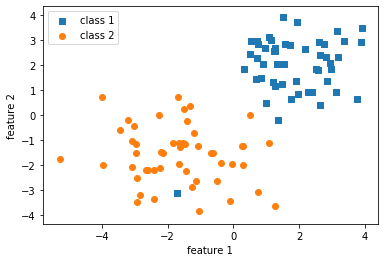

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
data = np.genfromtxt('data/joydata.txt', delimiter='\t')
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)
print(x[0:5])
print(y[0:5])
print('Class label counts:', np.bincount(y))     # historgram of class labels or bincount

plt.scatter(x[y==1, 0], x[y==1, 1], label='class 1', marker='s')  # class 1
plt.scatter(x[y==0, 0], x[y==0, 1], label='class 2', marker='o')  # class 0
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

__훈련자료와 검증자료__

- 학습자료에 존재할지도 모르는 자료의 편향성을 제거하기 위하여 모든 자료$^{samples}$들의 순서를 무작위로 섞습니다. 
- 학습자료를 7:3의 비율로 나누어 훈련자료$^{Training \ Samples}$와 검증자료$^{Validation \ Samples}$로 각각 저장합니다.  
- 난수발생의 재현성$^{Reproducibility}$을 위하여 시드$^{Seed}$를 정합니다.  

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/DataSet.png?raw=true" width="600">

__왜 훈련자료와 검증자료를 구분 할까요?__

기계학습에 있어서 학습할 데이터는 정말 중요한 부분입니다. 좋은 데이터가 많을 수록 모델이 잘 학습 할 수 있기 때문입니다. (세상에 존재하는 다양한 고양이들을 많이 볼수록 좋겠죠?)

훈련자료$^{Training \ Samples}$를 이용하여 모델이 학습을 하게 됩니다. 하지만 우리는 모델이 얼마만큼 학습을 잘 하였는지를 확인 하고, 학습이 부족하다면 추가적인 학습을 시행하여야 합니다. 이를 확인하기 위해 검증자료$^{Validation \ Samples}$를 사용합니다. 바로 __모델의 성능__ 을 평가하기 위해서 검증자료$^{Validation \ Samples}$를 사용 합니다. 

기계학습의 목적은 기존에 학습한 정보를 활용하여 한 번도 보지 못했던 자료에 대해 정확한 대답을 할 수 있도록 하는 방법입니다. 따라서 훈련자료$^{Training \ Samples}$를 통해 학습한 모델을 개발자들이 __모델의 성능__ 을 __검증__ 할 필요가 있었습니다. 이를 위해, 학습 자료에서 일부분을 검증자료$^{Validation \ Samples}$로 분리하여 모델의 성능을 검증하기 시작하였습니다. 물론, 성능이 좋지 않다면 파라미터들을 조정하거나 훈련자료를 추가하여 모델을 더 학습시켜 처음 보는 자료에 대해서도 올바른 정답을 할 수 있도록 훈련합니다.

위의 모든 과정을 통해 모델의 학습이 마치게 되면, 그 후에 모델의 __최종 성능__ 을 평가하기 위해 평가자료$^{Test \ Samples}$를 이용하여 모델을 평가하게 됩니다. 평가자료$^{Test \ Samples}$를 통해 나온 결과가 마음에 들지 않는다고 해서 모델의 파라미터를 변경하거나 추가적인 학습을 시행한다면, 이는 평가자료$^{Test \ Samples}$라 부를 수 없습니다.

예를 들어, 채점이 마친 시험지를 통해 정답을 확인 한 후 다시 시험에 응시해 높은 성적을 거두는 것과 비슷합니다. 엄하게 말하자면 속임수(Cheating)에 해당하는 것입니다.

In [7]:
import numpy as np
data = np.genfromtxt('data/joydata.txt')
np.random.seed(1)
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

num = int(x.shape[0] * 0.8) ##percentage
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]

print(x_train[:5])

[[-2.64 -2.2 ]
 [-2.97 -1.53]
 [ 1.    0.46]
 [-2.84 -3.22]
 [-0.05 -1.95]]


__특성값 조정: 표준화__

- 학습자료의 훈련자료와 검증자료의 평균값이 0, 표준편차가 1이 되도록 조정합니다. 

- 기계학습에서 성능 향상을 위하여 거치는 이런 과정을 __특성 조정__$^{Feature \ Scaling}$이라고 합니다.  우리가 곧 다루게 될 경사하강법$^{Gradient \ descent}$ 알고리즘에 적용하면 경사를 구할 때 좀 더 빠르게 수렴하도록 합니다.  우리가 여기서 시도하는 것은 표준화$^{Standardization}$라고 부르며, 각 특성의 평균값이 0가 되고 표준편차가 1이 되도록 모든 학습자료의 특성값들을 조정하는 것입니다. 표준화는 각 j번째 특성$x_j$에서 그 특성의 평균값$\mu_j$을 뺀 값을 그 특성의 표준편차 $\sigma_j$로 나누면 됩니다. 수식으로 나타내면 다음과 같습니다. 


\begin{align}
   \mathbf{x}_j := \frac{\mathbf{x}_j - \mu_j}{\sigma_j}  
\end{align}

여기서, $\mathbf{x}_j$는 n 개의 모든 학습자료의 j 번째 특성들로 구성된 벡터입니다.  이러한 표준화는 학습자료에 있는 각 특성에 모두 적용됩니다.

In [3]:
#mu, sigma = x_train.mean(axis=0), x_train.std(axis=0)
#x_train = (x_train - mu) / sigma
#x_test = (x_test - mu) / sigma

print(x_train[:5])
print(y_train[:5])

[[-2.64 -2.2 ]
 [-2.97 -1.53]
 [ 1.    0.46]
 [-2.84 -3.22]
 [-0.05 -1.95]]
[0 0 1 0 0]


__PopQuiz__:

우리가 지금 다루고 있는 훈련자료 x_train의 shape은 (100, 2)입니다. 그러면, 우리가 계산한 mu의 shape은 무엇입니까? 다른 말로 평균값은 몇 개가 있어야 하나요? 

__Answer__: 2

__훈련자료의 시각화__

지금까지 학습자료를 정리하였으며, 훈련자료와 검증자료를 다음과 같이 각각 시각화할 수 있습니다. 

In [ ]:
## remove 1st column before plotting; change shape(mx3) into shape(mx2) or use x_train, x_test
## x_train = X_train[ : , 1:]     

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
ax[0].scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label='class 1', marker='s')
ax[0].scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label='class 2', marker='o')
ax[1].scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')
ax[1].scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 2', marker='o')
ax[0].set_title('Training dataset')
ax[1].set_title('Test dataset')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].legend()
plt.show()

__편향을 포함하는 자료 구조__

기계학습을 시작하기 전, 자료 준비의 마지막 단계로 편향 문제를 어떻게 다루어야 할 지 결정해야 합니다.  두 가지 방법이 있습니다.  

방법 1. $z = \mathbf{w^Tx} + b$와 같이 바이어스를 독립된 항으로 다룰 수 있습니다.  
방법 2. $w_0 = b$과 $x_0 = 1$로 설정하여, 바이어스를 $z = \mathbf{w^Tx}$에 이미 포함하여 다룰 수 있습니다. 

두 방법으로 각각 식으로 요약하면 다음과 같습니다. 
\begin{align}
z &= \mathbf{w^Tx} + b = \sum_{j=1}^{m} x_j w_j + b \\
z &= \mathbf{w^Tx} = w_0x_0 + w_1x_1 + ... + w_m x_m = \sum_{j=0}^{m} x_j w_j 
\end{align}

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/simple_node_activate.png?raw=true" width="400">
<center>그림 1: 퍼셉트론</center>

여기서는 두 번째 방법을 택하기로 합시다. 
- 훈련자료와 검증자료에 존재할 수 있는 편향$^{bias}$을 다루기 위하여 자료의 모든 각 특성에$x^{(i)}_0 = 1$추가합니다. 특성 $x^{(i)}_0 = 1$이 추가된 자료에 대해 대문자($X$)사용하여 다른 자료와 구별하도록 합니다.  
- np.c 와 np.r 은 넘피 배열에 행과 열을 추가하는데 사용하는 방법이며, 구체적인 것은 넘피 자료를 참고하십시오.  

In [4]:
X_train = np.c_[ np.ones(len(x_train)), x_train ]
X_test  = np.c_[ np.ones(len(x_test)), x_test ]
print(X_train[:5])

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]


__PopQuiz__:

그러면, 이제 우리가 다루고 있는 훈련자료 x_train의 shape은 어떻게 되었습니까? 

__Answer__: 80 x 2 (x_train 의 shape 은 변하지 않았습니다. 단지 shape 80 x 3 인 X_train 이 생성된 것일 뿐입니다.)

In [5]:
print("x_train shape: {}, X_train shape: {}".format(x_train.shape, X_train.shape))

x_train shape: (80, 2), X_train shape: (80, 3)


## 2. 퍼셉트론의 훈련 단계$^{ML \ Training \ Step}$

앞에서 구현한 perceptronV1 혹은 perceptronV2 함수들을 활용하여 다음과 일반적인 percetron_train() 함수를 어렵지 않게 만들 수 있습니다. 특히 이 함수는 다양한 인자를 받아서 학습 알고리즘을 수행함으로 산출되는 퍼셉트론의 가중치를 반환합니다. 

앞 장에서 사용한 perceptron 함수들과 다른 점은 가중치 w를 더 이상 매개변수롤 사용하지 않았으며, 대신에 입력 특성벡터에 X0 원소가 포함되어 있는지 여부를 알리는 매개변수가 새로 포함되었습니다. 

함수 인자들에 대한 자세한 사항들은 함수 안에 있는 코멘트를 참고하십시오. 

## JoyCoding: perceptron_train()

In [ ]:
#%%writefile code/perceptron_train.py
# Author: Youngsup Kim, idebtor@gmail.com 
# 2018.03.10 - Creation

def perceptron_train(X, y, X0=False, eta=0.1, epochs=1, random_seed=1):
    """  Perceptron training function for binary class labels
    Input Parameters
        X : numpy.ndarray, shape=(n_samples, m_features), by default X0=False
            A 2D NumPy array containing the training examples
            or 
            If X0=True, X's shape=(n_samples, m_features+1) 
            It includes the bias or x0 = 1 for all samples 
        
        y : numpy.ndarray, shape=(n_samples,)
            A 1D NumPy array containing the true class labels
        
        X0: If True, then X must have X_0 = 1 in all samples.
             Set it Faslse, if X does not have X_0 
        
        eta : float (default: 0.1) 
            A learning rate for the parameter updates. Note that a learning
            rate has no effect on the direction of the decision boundary
            if the model weights are initialized to all zeros.
        
        epochs : int (default: 1), Number of passes over the training dataset.
        
        random_seed : int or None (default: 1)
            Seed for the pseudo-random number generator that initializes the
            weights w if w is None.
    
    Returns 
        w : numpy.ndarray, shape=(m_features, )
    
        If you wants W : numpy.ndarray, shape=(epochs, m_features) to use 
        when calling , then invoke this function with epochs = 1 multiple times 
        and save the result in the form of W = np.vstack([W, w]). 
        You may initialize the W = np.array([w]), where w is an initial weights.
    """
    
    if X0 == False:
        X = np.c_[ np.ones(len(X)), X ]
    
    randnum = np.random.RandomState(random_seed) 
    w = randnum.normal(loc=0.0, scale=0.01, size=X.shape[1])
           
    maxy, miny = y.max(), y.min()                 # for use of bipolar or unit step function
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)                     # Compute net input, same as np.dot(w.T, x)
            yhat = np.where(z > 0.0, maxy, miny)  # Apply unit step func and get output
            if yi != yhat:
                delta = eta * (yi - yhat) * xi                # Compute delta    
                w += delta                                    # Adjust weight
                #print('xi{}, \t (yi,yhat)=({},{}), delta{}, w{}'.format
                #         (np.round(xi,2), yi, yhat, np.round(delta,2), np.round(w,2)))
        
    return w

In [10]:
def perceptron_train(X, y, X0=False, eta=0.02, epochs=1, random_seed=1):
    if X0 == False:
        X = np.c_[ np.ones(len(X)), X ]
        
    randnum = np.random.RandomState(random_seed) 
    w = randnum.normal(loc=0.0, scale=0.01, size=X.shape[1])
           
    maxy, miny = y.max(), y.min()            
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)                             
            yhat = np.where(z > 0.0, maxy, miny)  
            if yi != yhat:
                delta = eta * (yi - yhat) * xi               
                w += delta                                
    return w

__perceptron_train()함수 호출의 예__

- 다음의 호출은 훈련 자료로 퍼셉트론을 1회 학습하고난 후 가중치를 반환한 것입니다. 

In [11]:
print(X_train[:5])
print(y_train[:5])
w = perceptron_train(X_train, y_train, X0=True, eta=0.02, epochs=1, random_seed=2)
print('w = ', w)

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]
[0 0 1 0 0]
w =  [-0.02416758  0.04263733  0.01383804]


## 3. 퍼셉트론의 예측 단계$^{Predict \ Step}$

이진 분류 퍼셉트론을 훈련하여 가중치 $w$를 구했다는 것은 곧 판별식(혹은 분류자$^{Classifier}$)를 구한 것입니다. 이제는 처음부터 구별하여 저장해두었던 검증자료를 가지고 우리가 구한 판별식이 예측을 얼마나 정확하게 하는지 검증하는 것입니다. 

이 일을 위하여 훈련자료의 각 샘플과 가중치를 곱한 값이 0보다 큰지 작은지 구별하여 클래스 예측값 $\hat{y}$을 구하고 이를 이미 각 샘플의 정해진 클래스 레이블 $y$과 비교하면 됩니다. 

예를 들면, X_train과 w의 shape은 각각 (70, 3)과 (3,)이므로, X_train과 w의 내적$^{dot \ product}$을 구하면, 70개의 각 자료에 대하여 w를 곱한 값을 한번에 구할 수 있으며, 이 결과의 shape은 (70,)입니다. 코딩은 다음과 같이 합니다. 
```
linear = np.dot(X, w)
```
다른 말로, 이것은 각 자료와 가중치의 곱 즉 $\mathbf{w^Tx}$를 자료의 수만큼 계산하는 것을 한 줄로 코딩한 것입니다. 이런 계산을 벡터라이제이션$^{Vectorization}$이라고 합니다.  이 배열의 각 요소의 값에 따라 클래스 레이블 구하면 이것이 예측값 $\hat{y}$입니다.  코딩은 다음과 같습니다. 
```
predicted_labels = np.where(linear > 0., 1, 0)
```
함수 perceptron_predict()는 예측값 $\hat{y}$을 반환합니다. 코딩은 다음과 같이 합니다. 

## JoyCoding: perceptron_predict() 

In [12]:
#%%writefile code/perceptron_predict.py
def perceptron_predict(X, w):
    """Perceptron prediction function for binary class labels

    Parameters
    ----------
    X : numpy.ndarray, shape=(n_samples, m_features)
        A 2D NumPy array containing the training examples

    w : numpy.ndarray, shape=(m_features)
        The model parameters of the perceptron in the form:
        np.array([weight_0, weight_1, weight_2, ... , weight_m])

    Returns
    -------
    predicted_labels : np.ndarray, shape=(n_samples)
        Numpy array containing the predicted class labels.

    """
    linear = np.dot(X, w)
    predicted_labels = np.where(linear > 0., 1, 0)    
    return predicted_labels

### 오차/정확도 측정

자 이제 우리는 이진 분류 퍼셉트론의 예측값 $\hat{y}$과 원래 훈련자료와 검증자료의 클래스 레이블 $y$를 가지고 있습니다.  이 둘을 비교하여 잘못 예측한 것이 얼마나 있는지 세어보면 됩니다. 그러면, 이것을 어떻게 코딩해야 하나요?

__version 0.1__

In [13]:
print('w =', w)
yhat_train = perceptron_predict(X_train, w)
missed = 0
m_samples = len(y_train)
for n in range(m_samples):
    if yhat_train[n] != y_train[n]: 
        missed  += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

w = [-0.02416758  0.04263733  0.01383804]
Misclassified:1/80


__version 0.2__

In [14]:
yhat_train = perceptron_predict(X_train, w)
missed = 0 # misclassified count
m_samples = len(y_train)
for yhati, yi in zip(yhat_train, y_train):
    if yhati != yi: 
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:1/80


__version 0.3__

In [15]:
yhat_train = perceptron_predict(X_train, w)
missed = np.sum(yhat_train != y_train)
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:1/80


__version 0.4__

In [16]:
missed = np.sum(perceptron_predict(X_train, w) != y_train)
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:1/80


- 결론적으로 우리는 훈련자료와 검증자료에 대한 이진 퍼셉트론의 정확도를 다음과 같이 코딩할 수 있습니다. 

In [17]:
missed_train = np.sum(perceptron_predict(X_train, w) != y_train)
missed_test = np.sum(perceptron_predict(X_test, w) != y_test)
print('Misclassified train:{}/{}'.format(missed_train, len(y_train)))
print('Misclassified test:{}/{}'.format(missed_test, len(y_test)))

Misclassified train:1/80
Misclassified test:1/20


### 시각화

지금까지 계산적으로 퍼셉트론을 훈련하여 가중치 즉 분류자(판별식)을 구했으며, 이를 사용하여 학습자료(훈련자료와 검증자료)에 대하여 이진 분류를 하여 정확도를 측정하였습니다. 이러한 결과들을 시각화하여 우리가 계산한 값들이 시각적으로 유효한지 확인하고자 합니다. 

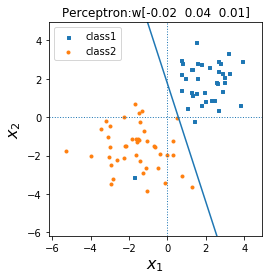

In [18]:
%run code/plot_xyw.py
plot_xyw(X_train, y_train, w, X0=True)

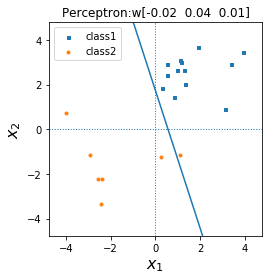

In [19]:
plot_xyw(X_test, y_test, w, X0=True)

- subplot()을 이용한 시각화 코드이며 참고용입니다. plot_xyw()을 이용하면 이런 코딩을 굳이 할 필요는 없습니다. 

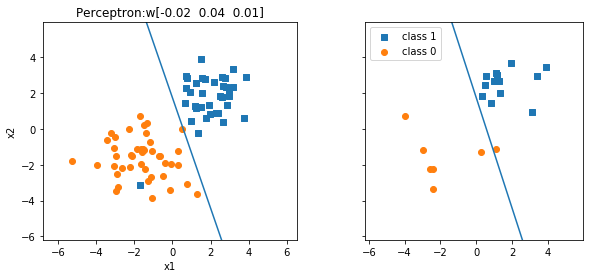

In [20]:
#Using subplot for fun
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

rmin, rmax = X_train.min(), X_train.max()
rmin -= (rmax - rmin) * 0.1    
rmax += (rmax - rmin) * 0.2       # because rmax is exclusive in np.arange()
x1 = np.arange(rmin, rmax, .1)
x2 = -w[0]/w[2] - w[1]*x1/w[2] 
ax[0].plot(x1, x2)  
ax[1].plot(x1, x2) 

ax[0].scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label='class 1', marker='s')
ax[0].scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label='class 0', marker='o')

ax[1].scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')
ax[1].scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 0', marker='o')

plt.xlim([rmin, rmax])
plt.ylim([rmin, rmax])
plt.gca().set_aspect('equal')
ax[1].legend(loc='upper left')
ax[0].set_title('Perceptron:w{}'.format(np.round(w, 2)))  #display weights at title
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
plt.show()

## Exercise 1: 

- 초기 가중치를 모두 0으로 설정하고, 학습률을 0.1, 03, 0.6으로, 또한 epochs를 1, 3, 6로 변화시키며 각각의 학습한 각각의 퍼셉트론 모델들이 산출하는 판별식들을 비교 관찰하고 의견을 나누어 보십시오. 

initial w =  [0. 0. 0.]
Number of training samples misclassified:  1
Number of test samples misclassified:  0


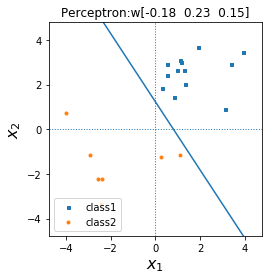

In [21]:
import matplotlib.pyplot as plt  
import numpy as np
%run code/perceptronV1.py

## Your code here: ~ 1 line
w = None                                     
w = np.zeros(X_train.shape[1]) 
print('initial w = ', w)
w = perceptron_train(X_train, y_train, X0=True, eta=0.1, epochs=2)

misclassified_train = np.sum(perceptron_predict(X_train, w) != y_train)
misclassified_test  = np.sum(perceptron_predict(X_test, w) != y_test)
print('Number of training samples misclassified: ', misclassified_train)
print('Number of test samples misclassified: ', misclassified_test)

%run code/plot_xyw.py
plot_xyw(X_test, y_test, w, X0=True)

## Exercise 2: 

- 초기 가중치를 난수로 설정하고, 설정하고, 학습률을 0.1, 03, 0.6으로, 또한 epochs를 1, 3, 6로 변화시키며 각각의 학습한 각각의 퍼셉트론 모델들이 산출하는 판별식들을 비교 관찰하고 의견을 나누어 보십시오. 

Number of training samples misclassified:  4
Number of test samples misclassified:  4


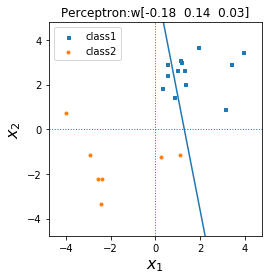

In [22]:
import matplotlib.pyplot as plt  
import numpy as np
%run code/perceptronV1.py

w = perceptron_train(X_train, y_train, X0=True, eta=0.1, epochs=1)

misclassified_train = np.sum(perceptron_predict(X_train, w) != y_train)
misclassified_test  = np.sum(perceptron_predict(X_test, w) != y_test)
print('Number of training samples misclassified: ', misclassified_train)
print('Number of test samples misclassified: ', misclassified_test)

%run code/plot_xyw.py
plot_xyw(X_test, y_test, w, X0=True)

## 제 5-1 강 학습 정리
- 기계학습의 전반적인 작업의 흐름을 이해하기
- 자료 준비와 전처리 과정 이해하기

## 제 5-2 강 학습 정리
- 기계학습을 적용하는데 필요한 작업 흐름도를 이해하기  
- 자료 준비와 전처리 과정 필요성과 역할
- 모델의 정확도 평가

------------